# Feature selection

## Loading csv

In [10]:
# !pip install matplotlib

In [11]:
# !pip install scikit-learn

In [19]:
# !pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df_merged_top = pd.read_csv('data/oil_data.csv')

df_merged_top.rename(columns = {'Henry Hub Natural Gas Spot Price Dollars per Million Btu':'Henry_hub_natural_gas_spot'}, inplace = True)

df_merged = df_merged_top.sort_values(by='Date').sort_values(by='Date')

df_merged

,Date,WTI_dollar_per_barrel,copper_close,dji_index,gold_close,eur_close,Henry_hub_natural_gas_spot,rub_close,silver_close,nasdaq_close,SP500,pal_close,corn_close,heat_close
0,2003-12-01,29.89,0.9555,9899.049805,402.700012,0.83577,5.02,29.700001,5.445,1989.819946,1070.119995,189.000000,246.50,0.8340
1,2003-12-02,30.74,0.9695,9853.639648,403.700012,0.82720,5.45,29.690001,5.496,1980.069946,1066.619995,192.750000,245.75,0.8626
2,2003-12-03,30.61,0.9760,9873.419922,403.899994,0.82488,5.45,29.690001,5.468,1960.250000,1064.729980,192.350006,249.25,0.8662
3,2003-12-04,31.24,0.9630,9930.820312,403.299988,0.82775,5.70,29.680000,5.452,1968.800049,1069.719971,198.399994,246.75,0.8819
4,2003-12-05,30.68,0.9690,9862.679688,406.399994,0.82055,6.27,29.620001,5.472,1937.819946,1061.500000,201.300003,246.50,0.8636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,2021-12-27,75.49,2.2000,20087.199219,1478.599976,0.91228,3.45,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4700,2021-12-28,76.01,2.2000,20087.199219,1478.599976,0.91228,3.32,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4701,2021-12-29,76.58,2.2000,20087.199219,1478.599976,0.91228,3.40,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4702,2021-12-30,76.83,2.2000,20087.199219,1478.599976,0.91228,3.82,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417


In [2]:
df_merged.Date.min()

'2003-12-01'

In [3]:
df_merged.Date.max()

'2021-12-31'

## Data Validation

In [4]:
df_merged

,Date,WTI_dollar_per_barrel,copper_close,dji_index,gold_close,eur_close,Henry_hub_natural_gas_spot,rub_close,silver_close,nasdaq_close,SP500,pal_close,corn_close,heat_close
0,2003-12-01,29.89,0.9555,9899.049805,402.700012,0.83577,5.02,29.700001,5.445,1989.819946,1070.119995,189.000000,246.50,0.8340
1,2003-12-02,30.74,0.9695,9853.639648,403.700012,0.82720,5.45,29.690001,5.496,1980.069946,1066.619995,192.750000,245.75,0.8626
2,2003-12-03,30.61,0.9760,9873.419922,403.899994,0.82488,5.45,29.690001,5.468,1960.250000,1064.729980,192.350006,249.25,0.8662
3,2003-12-04,31.24,0.9630,9930.820312,403.299988,0.82775,5.70,29.680000,5.452,1968.800049,1069.719971,198.399994,246.75,0.8819
4,2003-12-05,30.68,0.9690,9862.679688,406.399994,0.82055,6.27,29.620001,5.472,1937.819946,1061.500000,201.300003,246.50,0.8636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,2021-12-27,75.49,2.2000,20087.199219,1478.599976,0.91228,3.45,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4700,2021-12-28,76.01,2.2000,20087.199219,1478.599976,0.91228,3.32,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4701,2021-12-29,76.58,2.2000,20087.199219,1478.599976,0.91228,3.40,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4702,2021-12-30,76.83,2.2000,20087.199219,1478.599976,0.91228,3.82,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417


In [5]:
df_merged['Date'].min()

'2003-12-01'

In [6]:
df_merged['Date'].max()

'2021-12-31'

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        4704 non-null   object 
 1   WTI_dollar_per_barrel       4704 non-null   float64
 2   copper_close                4704 non-null   float64
 3   dji_index                   4704 non-null   float64
 4   gold_close                  4704 non-null   float64
 5   eur_close                   4704 non-null   float64
 6   Henry_hub_natural_gas_spot  4704 non-null   float64
 7   rub_close                   4704 non-null   float64
 8   silver_close                4704 non-null   float64
 9   nasdaq_close                4704 non-null   float64
 10  SP500                       4704 non-null   float64
 11  pal_close                   4704 non-null   float64
 12  corn_close                  4704 non-null   float64
 13  heat_close                  4704 

In [8]:
#null check
null_check = df_merged.isnull()  # This creates a DataFrame of boolean values

# You can also use the .isna() method, which is equivalent to .isnull()
# null_check = df.isna()

# To count the number of null values in each column, you can use .sum()
null_count = df_merged.isnull().sum()

# To count the number of null values in the entire DataFrame, use .sum() twice
total_null_count = df_merged.isnull().sum().sum()

print("DataFrame with null check:")
print(null_check)
print("\nNumber of null values in each column:")
print(null_count)
print("\nTotal number of null values in the DataFrame:", total_null_count)


DataFrame with null check:
       Date  WTI_dollar_per_barrel  copper_close  dji_index  gold_close  \
0     False                  False         False      False       False   
1     False                  False         False      False       False   
2     False                  False         False      False       False   
3     False                  False         False      False       False   
4     False                  False         False      False       False   
...     ...                    ...           ...        ...         ...   
4699  False                  False         False      False       False   
4700  False                  False         False      False       False   
4701  False                  False         False      False       False   
4702  False                  False         False      False       False   
4703  False                  False         False      False       False   

      eur_close  Henry_hub_natural_gas_spot  rub_close  silver_close  \


## Visualizing data features

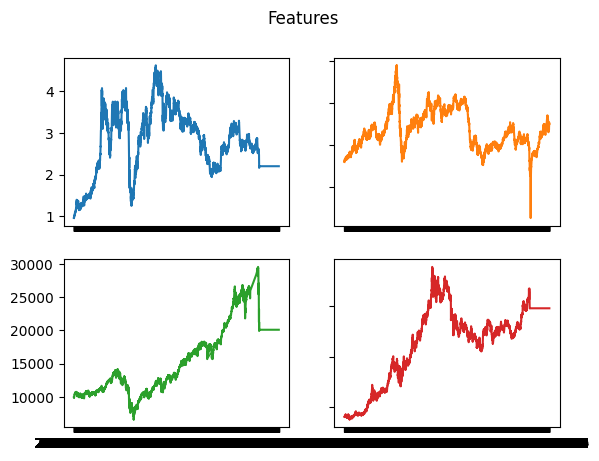

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Features')
ax1.plot(df_merged.Date, df_merged.copper_close, label='copper')
ax2.plot(df_merged.Date, df_merged.WTI_dollar_per_barrel, 'tab:orange', label='WTI_dollar_per_barrel')
ax3.plot(df_merged.Date, df_merged.dji_index, 'tab:green', label='dji_index')
ax4.plot(df_merged.Date, df_merged.gold_close, 'tab:red', label='gold_price')

for ax in fig.get_axes():
    ax.label_outer()

plt.show() 


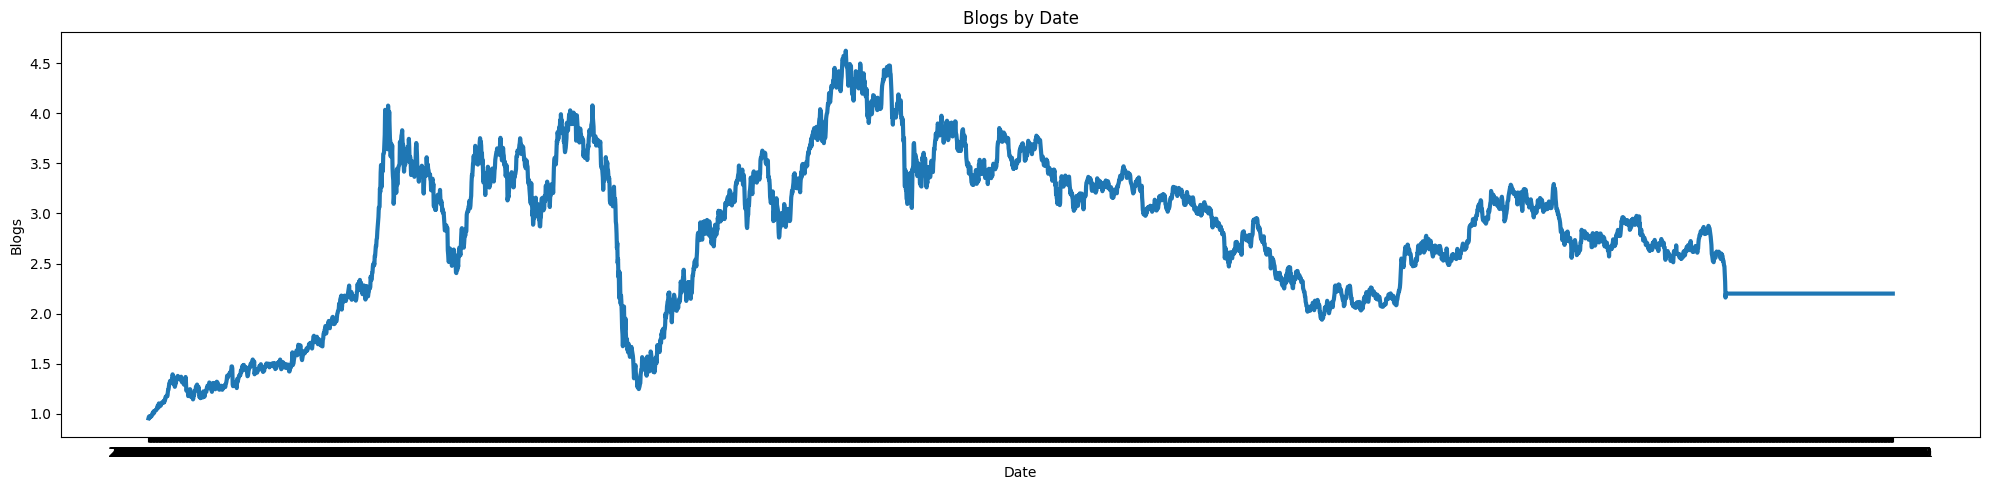

In [27]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
WTI = df_merged['WTI_dollar_per_barrel'].to_numpy().reshape(-1, 1)
WTI = scaler.fit_transform(WTI)
Copper = df_merged['copper_close'].to_numpy().reshape(-1, 1)
Copper = scaler.fit_transform(WTI)
dji_index = df_merged['dji_index'].to_numpy().reshape(-1, 1)
dji_index = scaler.fit_transform(WTI)


plt.figure(figsize=(20,5))

plt.plot(df_merged.Date, df_merged.copper_close, label='copper_close', 
         linewidth=3)
# plt.plot(df_merged.Date, df_merged.dji_index, label='dji_index',
#          label='dji_index', linewidth=3)
plt.title('Blogs by Date')
plt.xlabel('Date')
plt.ylabel('Blogs')

plt.tight_layout()

# Display plot

plt.show() 




# pyplot.plot(WTI, color='red')
# pyplot.plot(Copper, color='green')
# pyplot.plot(dji_index, color='blue')
# # pyplot.plot(Copper, color='green')
# # pyplot.plot(Copper, color='green')
# # pyplot.plot(Copper, color='green')
# pyplot.legend(['WTI','Copper','dji_index'])

## Applying Min-Max Scaler

In [ ]:
scaler = MinMaxScaler()

In [15]:
df_merged.iloc[:,1]

3791    29.89
3790    30.74
3789    30.61
3788    31.24
3787    30.68
        ...  
4       31.72
3       28.96
2       26.96
1       20.48
0       25.09
Name: WTI_dollar_per_barrel, Length: 3792, dtype: float64

In [16]:
df_merged = pd.DataFrame(scaler.fit_transform(df_merged), columns=df_merged.columns[1:])

ValueError: could not convert string to float: '2003-12-01'

In [12]:
df_merged.head()

,Date,WTI_dollar_per_barrel,copper_close,dji_index,gold_close,eur_close,Henry_hub_natural_gas_spot,rub_close,silver_close,nasdaq_close,SP500
3791,2003-12-01,29.89,0.9555,9899.049805,402.700012,0.83577,5.02,29.700001,5.445,1989.819946,1070.119995
3790,2003-12-02,30.74,0.9695,9853.639648,403.700012,0.82720,5.45,29.690001,5.496,1980.069946,1066.619995
3789,2003-12-03,30.61,0.9760,9873.419922,403.899994,0.82488,5.45,29.690001,5.468,1960.250000,1064.729980
3788,2003-12-04,31.24,0.9630,9930.820312,403.299988,0.82775,5.70,29.680000,5.452,1968.800049,1069.719971
3787,2003-12-05,30.68,0.9690,9862.679688,406.399994,0.82055,6.27,29.620001,5.472,1937.819946,1061.500000


## Spliting data into train and test 

In [28]:
#splitting data into train and test dataset
from sklearn.model_selection import train_test_split

X = df_merged.iloc[:,1:]
Y = df_merged.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
X_train.shape

(3151, 13)

In [29]:
X_test.shape

(1553, 13)

In [30]:
# define a function to evaluate features by using randomforest as prediction model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot

def plot_result(X_train, y_train, Xt, yt):
#     regr = RandomForestRegressor(max_depth=2, random_state=0)
    
    #multi-layer perceptron model
    Mregr =  MLPRegressor(random_state=1, max_iter=2000)
    
    Mregr.fit(X_train, y_train)
    pred = Mregr.predict(Xt)
    print('MSE : ')
    print(mean_squared_error(yt.tolist(), pred))

    #plotting
    #pyplot.figure(figsize=(12,8), dpi= 50)
    pyplot.figure(figsize=(20,5))

    pyplot.plot(pred, color='red')
    pyplot.plot(yt.tolist(), color='green')
    pyplot.legend(['pred','actaul'])


## Heatmap or correlation map

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

data = df_merged
X = data.iloc[:,1:]  #independent columns
y = data.iloc[:,0]    #target column i.e WTI Oil price
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
pyplot.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

ValueError: could not convert string to float: '2003-12-01'

Here `copper, gold and silver` are positively correlated to WTI_price and `eur_close, rub_close` are negatively correlated.

**Let us take the top feature according to the correlation map above**

In [ ]:
plot_result(X_train,y_train,X_test,y_test)

In [ ]:
map_top = X_train[['copper_close', 'eur_close','silver_close' ]]
mapt_top = X_test[['copper_close', 'eur_close', 'silver_close']]
plot_result(map_top,y_train,mapt_top,y_test)

There is not much difference between the mse error value but when we train the model on huge datasets then the time for training 3 features is significantly less then training 10 features.  

## Xgboost feature importance


In [33]:
# !pip install xgboost

In [34]:
from numpy import loadtxt
from xgboost import XGBClassifier,XGBRegressor
from matplotlib import pyplot

C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

[0.5212906  0.03020545 0.07393096 0.11169196 0.03043553 0.07070778
 0.06484134 0.03077391 0.06612249]


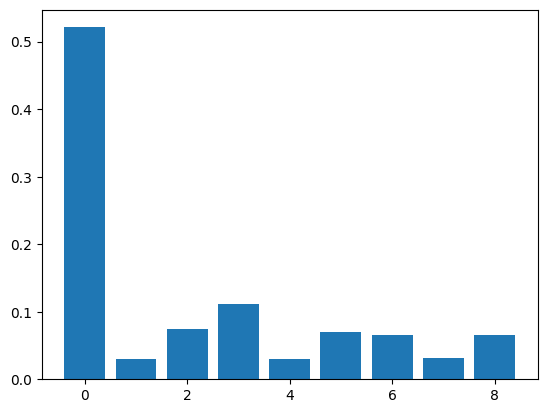

In [35]:
X = df_merged.iloc[:,1:]
y = df_merged.iloc[:,0]

# fit model no training data
model = XGBRegressor()
model.fit(X, y)

# feature importance
print(model.feature_importances_)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

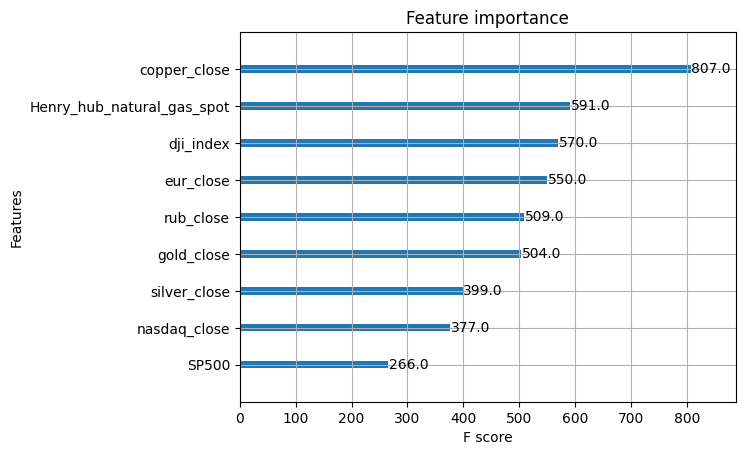

In [36]:
# visualizing the above plot
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

**Lets first select all the features**

MSE : 
0.004333985765637492


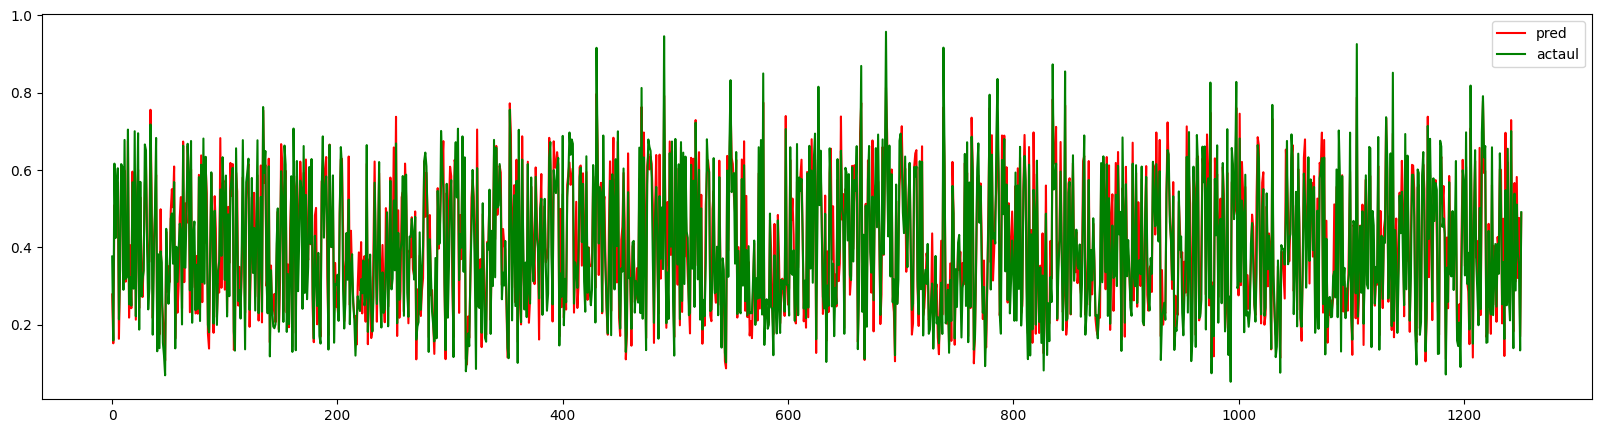

In [40]:
plot_result(X_train, y_train, X_test, y_test)

**Select the top features according to the feature importance score given by Xgboost**

In [37]:
X_train.columns

Index(['copper_close', 'dji_index', 'gold_close', 'eur_close',
       'Henry_hub_natural_gas_spot', 'rub_close', 'silver_close',
       'nasdaq_close', 'SP500'],
      dtype='object')

MSE : 
0.00842849439332238


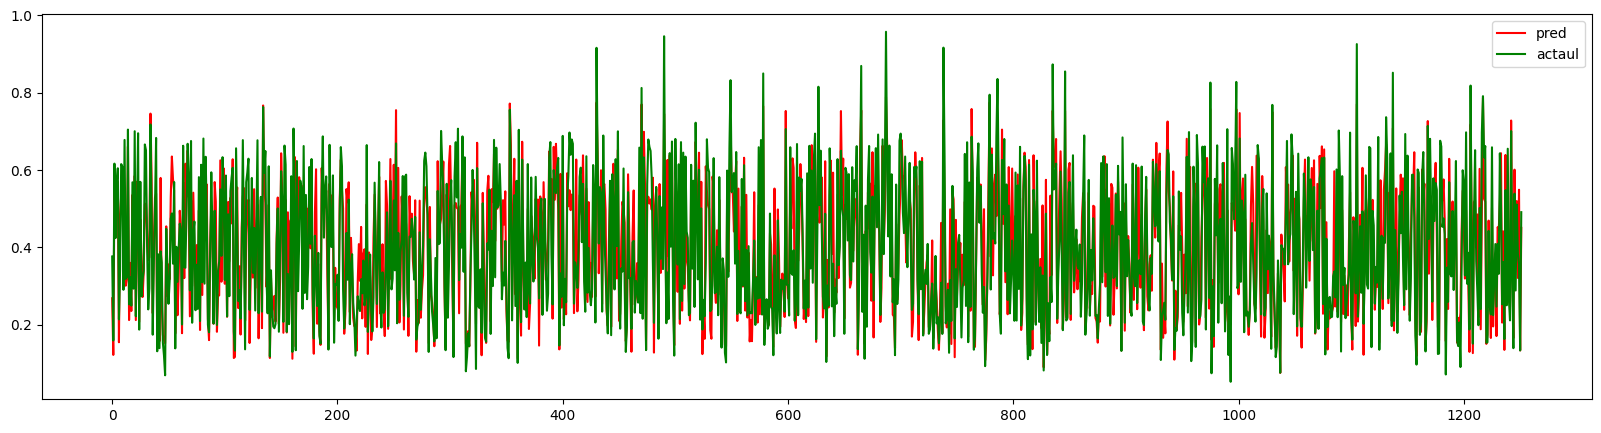

In [38]:
#top 3
Xg_top = X_train[['copper_close', 'Henry_hub_natural_gas_spot', 'dji_index','eur_close']]
Xgt_top = X_test[['copper_close', 'Henry_hub_natural_gas_spot', 'dji_index','eur_close']]

plot_result(Xg_top, y_train, Xgt_top, y_test)

**Select the bottom 3 features according to the feature importance score given by Xgboost**

MSE : 
0.01387513101944183


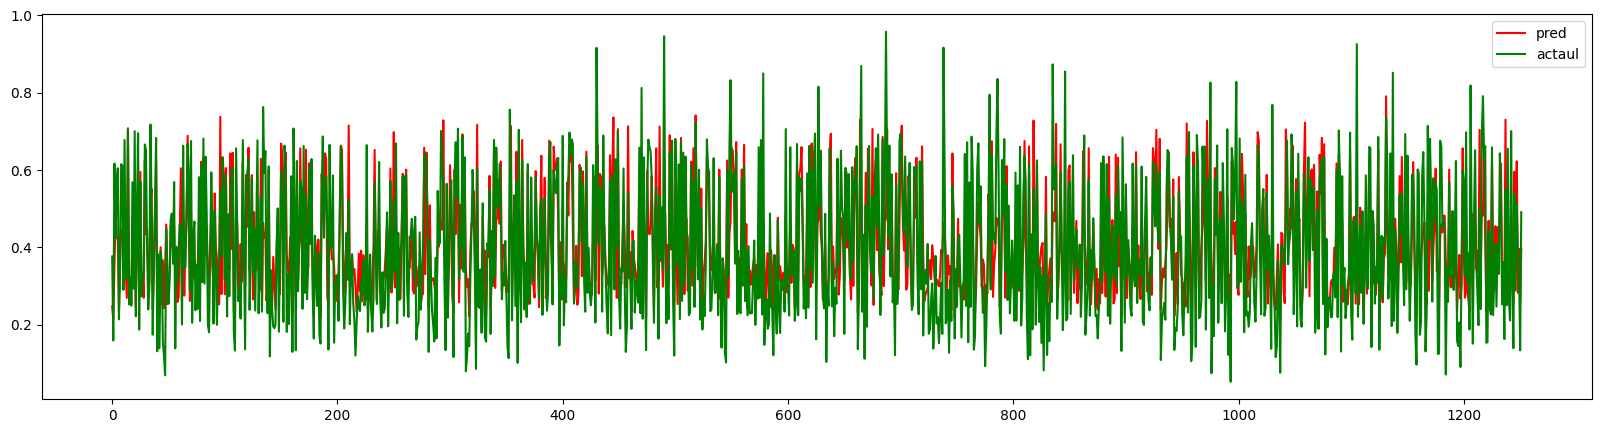

In [39]:
#bottom 3
Xg_top = X_train[['silver_close','nasdaq_close','SP500']]
Xgt_top = X_test[['silver_close','nasdaq_close','SP500']]

plot_result(Xg_top, y_train, Xgt_top, y_test)

Here we can see that just taking top  features the mse error reduces and taking bottom 3 features the error increases significantly.

# SelectFromModel 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

sfm_selector = SelectFromModel(estimator=XGBRegressor())
sfm_selector.fit(X_train, y_train)
X.columns[sfm_selector.get_support()]


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

Index(['copper_close', 'eur_close'], dtype='object')

Feature importance scores can be used for feature selection in scikit-learn.

This is done using the SelectFromModel class that takes a model and can transform a dataset into a subset with selected features.

This class can take a pre-trained model, such as one trained on the entire training dataset. It can then use a threshold to decide which features to select. This threshold is used when you call the transform() method on the SelectFromModel instance to consistently select the same features on the training dataset and the test dataset.

---

Feature below threshold are eliminated

SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or featureimportances attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or featureimportances values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument.



In [43]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.feature_selection import SelectFromModel

X = df_merged.iloc[:,1:]
Y = df_merged.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# fit model on all training data
model = XGBRegressor() 
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = mean_squared_error(y_test, predictions)
print("Original MSE: " + str(accuracy) + "\n\n")

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)

    select_X_train = selection.transform(X_train)
    print((select_X_train.shape))
        
    # train model
    selection_model = XGBRegressor() #XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = mean_squared_error(y_test, predictions)
    print("Thresh=%.3f, n=%d, MSE: %.2f" % (thresh, select_X_train.shape[1], accuracy))


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

Original MSE: 0.11429666994680229


(2540, 9)


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.023, n=9, MSE: 0.11
(2540, 8)
Thresh=0.031, n=8, MSE: 0.11
(2540, 7)
Thresh=0.036, n=7, MSE: 0.11


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(2540, 6)


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.044, n=6, MSE: 0.11
(2540, 5)
Thresh=0.070, n=5, MSE: 0.11
(2540, 4)


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a f

Thresh=0.081, n=4, MSE: 0.11
(2540, 3)
Thresh=0.083, n=3, MSE: 0.12
(2540, 2)
Thresh=0.120, n=2, MSE: 0.13
(2540, 1)
Thresh=0.513, n=1, MSE: 0.16


C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Here we can see that the mse error is least (8.49) when the number of features are 9 and the threshold value is 0.022. But here we can consider taking only 7 features and that will give us a close mse valueo of 8.8 which is acceptable and the other benifit will be that the training time will decrease as number of features decreases

# Recursive feature elimination

It recursively eliminates features

    Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) will then select features by recursively considering smaller and smaller sets of features. Firstly, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



## without feature elimination


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

MSE : 
0.004333985765637492


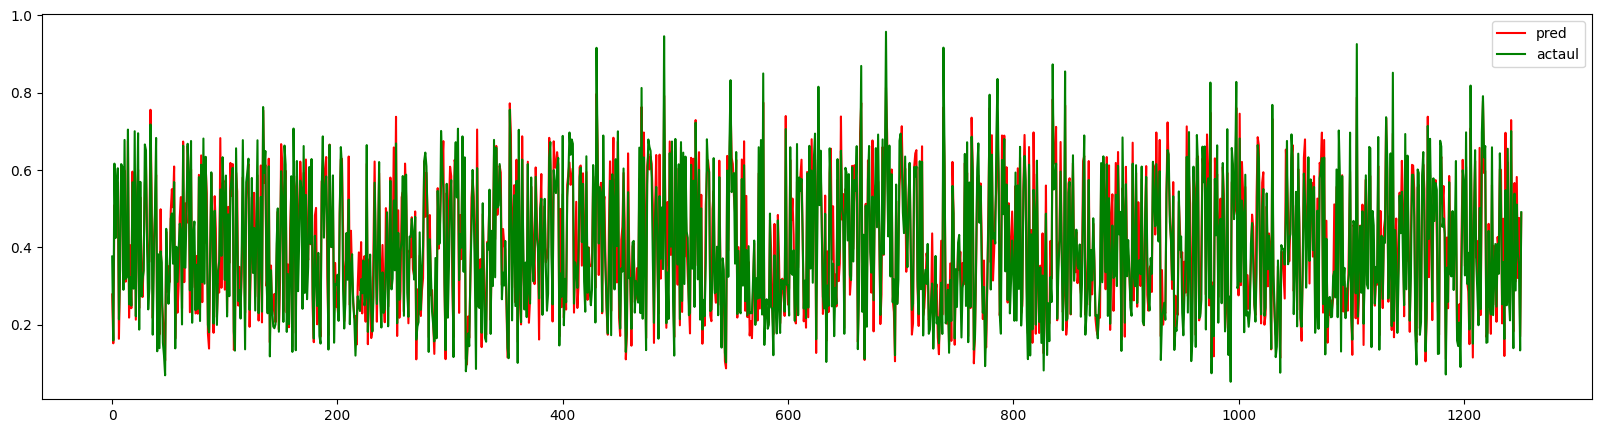

In [45]:
plot_result(X_train,y_train,X_test,y_test)

## With feature elimination

In [46]:
from sklearn.feature_selection import RFECV

In [47]:
m = RFECV(RandomForestRegressor(),scoring="neg_mean_squared_error" )

In [48]:
m.fit(X_train,y_train)

RFECV(estimator=RandomForestRegressor(), scoring='neg_mean_squared_error')

In [49]:
pred = m.predict(X_test)

0.0003617513125359557


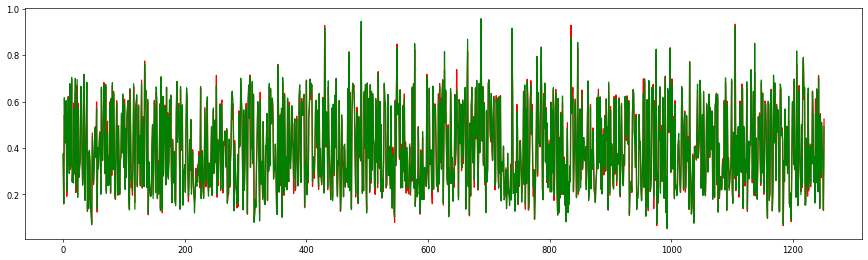

In [50]:
print(mean_squared_error(y_test,pred))

from matplotlib import pyplot
pyplot.figure(figsize=(18,5), dpi= 60)
pyplot.plot(pred, color = 'red')
pyplot.plot(y_test.tolist(), color = 'green')

## Feature selection using Pearson’s Correlation Coefficient via the f_regression() function

f_regression is derived from r_regression and will rank features in the same order if all the features are positively correlated with the target.

(2540, 3)
MSE : 
0.007905170469091255


<Figure size 1080x300 with 0 Axes>

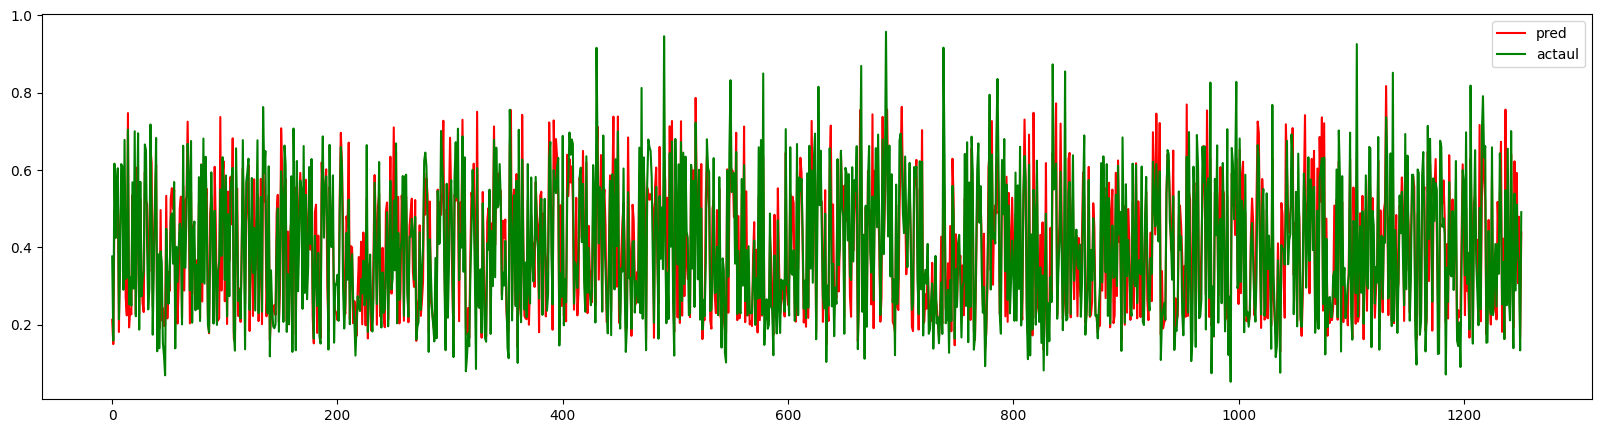

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=3)
X_selected = fs.fit_transform(X_train, y_train)
Xt_selected = fs.fit_transform(X_test, y_test)

print(X_selected.shape)

pyplot.figure(figsize=(18,5), dpi= 60)
plot_result(X_selected,y_train,Xt_selected,y_test)